In [8]:
import pandas as pdd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode

In [10]:
dataset = pdd.read_csv('Cryotherapy.csv')
dataset.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [11]:
dataset.drop('Time', axis=1, inplace=True)
dataset.head()

,sex,age,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,5,1,100,0
1,1,29,5,1,96,1
2,1,50,1,3,132,0
3,1,32,7,3,750,0
4,1,67,1,1,42,0


In [12]:
dataset.head()

,sex,age,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,5,1,100,0
1,1,29,5,1,96,1
2,1,50,1,3,132,0
3,1,32,7,3,750,0
4,1,67,1,1,42,0


In [13]:
X = dataset.drop('Result_of_Treatment', axis=1)
y = dataset['Result_of_Treatment']

In [14]:
print(X)
print(y)

    sex  age  Number_of_Warts  Type  Area
0     1   35                5     1   100
1     1   29                5     1    96
2     1   50                1     3   132
3     1   32                7     3   750
4     1   67                1     1    42
..  ...  ...              ...   ...   ...
85    2   34                3     3    95
86    2   20                6     1    75
87    2   35                8     3   100
88    1   24               10     1    20
89    1   19                8     1   160

[90 rows x 5 columns]
0     0
1     1
2     0
3     0
4     0
     ..
85    0
86    1
87    0
88    1
89    1
Name: Result_of_Treatment, Length: 90, dtype: int64


In [15]:
def euclidean_distance(pt1,pt2):
    distance=np.sqrt(np.sum(pt1-pt2)**2)
    return distance

a=np.array([3,4])
b=np.array([5,9])

print(euclidean_distance(a,b))

7.0


In [16]:
def KNN(X_train,X_test,y_train,y_test,k_val):
    y_hat = []
    for test_pt in X_test.to_numpy():
        distances = []
        for i in range(len(X_train)):
            distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pt))
        
        distance_data = pdd.DataFrame(data=distances, columns=['distance'], index = y_train.index)
        
        k_neighbours_list = distance_data.sort_values(by=['distance'], axis=0)[:k_val]
        
        labels = y_train.loc[k_neighbours_list.index]
        
        voting = mode(labels).mode[0]
        
        y_hat.append(voting)
    
    return y_hat

In [41]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=.3, random_state=4)
y_hat_test = KNN(X_train,X_test,y_train,y_test,k_val=5)

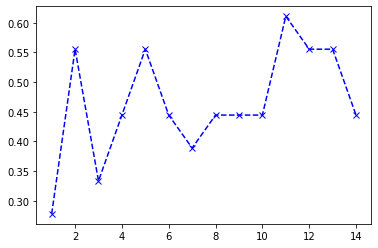

In [30]:
accuracy_vals = []
for i in range(1,15):
    y_hat_test = KNN(X_train,X_test,y_train,y_test,k_val=i)
    accuracy_vals.append(accuracy_score(y_test,y_hat_test))
plt.plot(range(1,15), accuracy_vals, color='blue', linestyle= 'dashed', marker='x')

In [42]:
y_hat_test = KNN(X_train, X_test, y_train, y_test, k_val=8)
print(accuracy_score(y_test,y_hat_test))



0.7407407407407407


In [ ]:
sns.scatterplot(data=dataset, x = X_test['IO'], y = X_test['MaxIP'], hue= 'Class')

KeyError: ignored

# New Section